In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
def f(x):
    return x**2 + x**4

In [48]:
N = 10000
gaussian_samples = np.random.randn(N)
f(gaussian_samples).mean()  # should be sigma^2 + 3 sigma^4 ~ 4 when sigma^2=1

4.059821010639036

In [49]:
from scipy.stats import norm, t
samples = np.random.standard_t(df=1., size=(N,))
weights = norm.pdf(samples) / t.pdf(samples, 1)
normalized_weights = weights / weights.sum()

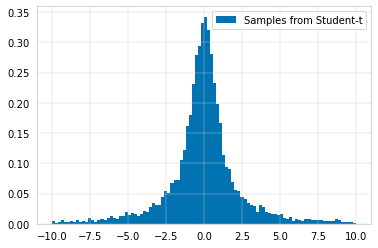

In [50]:
fig, ax = plt.subplots()
_ = ax.hist(samples, range=(-10, 10), bins=100, density=True, label="Samples from Student-t")
ax.legend()

In [51]:
f(samples).mean() # wrong answer as expected

268361582820.3419

In [52]:
# importance sampling
(f(samples) * normalized_weights).sum()

3.92833481858932

In [53]:
# importance resampling
from scipy.stats import multinomial
resampled_idx = np.random.choice(N, size=N, replace=True, p=normalized_weights)
resamples = samples[resampled_idx]
f(resamples).mean()

3.822184924167249

[(-10.0, 10.0)]

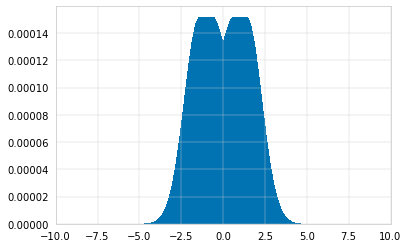

In [54]:
fig, ax = plt.subplots()
ax.bar(samples, normalized_weights)
ax.set(xlim=(-10, 10))

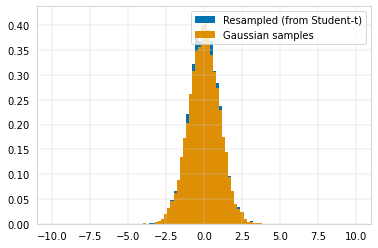

In [55]:
fig, ax = plt.subplots()
_ = ax.hist(resamples, range=(-10, 10), bins=100, density=True, label="Resampled (from Student-t)")
_ = ax.hist(gaussian_samples, range=(-10, 10), bins=100, density=True, label="Gaussian samples")
ax.legend()